In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [2]:
HI = pn.RecAtom('H',1)
C = pn.Continuum()

In [34]:
tem = np.linspace(1e3, 2e4, 100)
#tem=1e4

In [35]:
cont = C.get_continuum(tem=tem, den=1e4, He1_H=0.09, He2_H=0.01, wl=np.array([3643,3861]))

In [36]:
try:
    BJ_HI = cont[0] - cont[1]
except:
    BJ_HI = cont[0,:] - cont[1,:]
BJ_HI

array([0.59143377, 0.52792544, 0.47699684, 0.4350555 , 0.39980432,
       0.36969089, 0.34362776, 0.32081926, 0.30067713, 0.28277695,
       0.26672375, 0.2540712 , 0.24380049, 0.23434151, 0.22558274,
       0.21744183, 0.20989998, 0.20289567, 0.19631691, 0.19012216,
       0.18427451, 0.17888812, 0.17456126, 0.17043574, 0.16649203,
       0.1627171 , 0.15910165, 0.15563047, 0.15234563, 0.14928201,
       0.14632587, 0.14347189, 0.14071774, 0.13805382, 0.13551667,
       0.13332825, 0.13120508, 0.12923853, 0.1273447 , 0.12550406,
       0.12371097, 0.12196295, 0.12025826, 0.11859807, 0.11697914,
       0.11539875, 0.11385554, 0.11237354, 0.11113666, 0.1099249 ,
       0.10873752, 0.10757382, 0.10643339, 0.1053182 , 0.10422466,
       0.10315216, 0.10210015, 0.10106809, 0.10005695, 0.09906582,
       0.09809866, 0.09725237, 0.09644422, 0.09564959, 0.09486925,
       0.09410277, 0.09334886, 0.09260724, 0.09187765, 0.09115982,
       0.09045349, 0.08976009, 0.08907785, 0.08840929, 0.08780

In [38]:
tem_pred = C.T_BJ(BJ_HI = BJ_HI, den=1e4*np.ones_like(BJ_HI), He1_H=0.09*np.ones_like(BJ_HI), He2_H=0.01*np.ones_like(BJ_HI), wl_bbj=3643, wl_abj=3861, HI_label='11_2')

In [162]:
N_T = 100
T_warm = 10000
T_cold = np.linspace(500, 10000, N_T)
Ne_warm = 1e4
Ne_cold = 1e4
wl = np.array([3643,3861])
wl = np.array([8100,8400])
HI_label = '11_2'
HI_label = '9_3'

cont_warm = C.get_continuum(T_warm, den=Ne_warm, He1_H=0.09, He2_H=0.01, wl=wl, HI_label=None)
HI_warm = HI.getEmissivity(T_warm, den=Ne_warm, label=HI_label)

cont_cold = C.get_continuum(T_cold, den=Ne_cold*np.ones_like(T_cold), He1_H=0.09*np.ones_like(T_cold), He2_H=0.01*np.ones_like(T_cold), 
                            wl=wl, HI_label=None)

HI_cold = HI.getEmissivity(T_cold, den=Ne_cold*np.ones_like(T_cold), label=HI_label, product=False)

In [164]:
def get_T_pred(w, Ne=1e4):
    cont_mix = (1-w) * np.tile(np.array([cont_warm]).T, (1, 100)) + w * cont_cold
    HI_mix = (1-w) * np.tile(np.array([HI_warm]).T, (1, 100)) + w * HI_cold

    BJ_mix = (cont_mix[0,:] - cont_mix[1,:]) / HI_mix
    T_pred = C.T_BJ(BJ_HI = BJ_mix, den=Ne*np.ones_like(BJ_HI), He1_H=0.09*np.ones_like(BJ_HI), He2_H=0.01*np.ones_like(BJ_HI), 
                    wl_bbj=wl[0], wl_abj=wl[1], HI_label=HI_label)
    return T_pred

In [165]:
N_w = 30
ws = np.logspace(-2,0,N_w)
T_preds = np.ones((N_w, N_T))
T_preds.shape

for i, w in enumerate(ws):
    print(i)
    T_preds[i,:] = get_T_pred(w, 1e2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


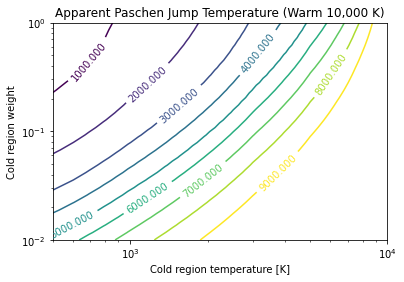

In [170]:
f, ax = plt.subplots()
T_cold_2D, ws_2D = np.meshgrid(T_cold, ws)
cs = ax.contour(T_cold_2D, ws_2D, T_preds, levels=(1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000))
ax.set_xscale("log") 
ax.set_yscale("log") 
ax.clabel(cs)
ax.set_xlabel('Cold region temperature [K]')
ax.set_ylabel('Cold region weight')
ax.set_title('Apparent Paschen Jump Temperature (Warm 10,000 K)')
f.savefig('ApparentPJ_temp.pdf');

In [167]:
T_preds

array([[ 5292.83369066,  5823.09885012,  6270.72676103, ...,
        10310.85838275, 10312.05592936, 10313.21719924],
       [ 4895.59263708,  5420.99226896,  5901.79342057, ...,
        10310.45258827, 10311.85611184, 10313.21719924],
       [ 4558.03154267,  4996.60130693,  5507.07442265, ...,
        10309.97701663, 10311.62192011, 10313.21719924],
       ...,
       [  750.44022918,   820.71981374,   900.23518412, ...,
        10145.64395961, 10229.70446743, 10313.21719924],
       [  732.10036592,   799.80107615,   876.84303188, ...,
        10117.62310993, 10215.53641449, 10313.21719924],
       [  716.14680891,   781.61818694,   856.48026449, ...,
        10085.07540598, 10199.00519906, 10313.21719924]])